In [1]:
from numpy import *
import operator

In [2]:
def createDataSet():
    group = array([[1.0,1.1],[1.0,1.0],[0,0],[0,0.1]])
    labels = ['A', 'A', 'B', 'B']
    return group, labels

In [3]:
group, labels = createDataSet()
print('group = ' + str(group))
print('labels = ' + str(labels))

group = [[1.  1.1]
 [1.  1. ]
 [0.  0. ]
 [0.  0.1]]
labels = ['A', 'A', 'B', 'B']


In [30]:
def classify0(inX, dataSet, labels, k, labelstart=0):
    '''
    inX: 用于分类的输入向量,为新输入的实例样本；
    dataSet: 输入的训练集；
    labels：训练集所对应的标签；
    k：用于选择最近邻居的数目
    
    return: 输出前k个类别中出现率最高的类别作为结果
    '''
    
    # 1、距离计算
    dataSetSize = dataSet.shape[0]
    ## np.tile(a,b): 相当于把a按照b(如：（5,2）即把a复制5行2列)的要求复制那么多遍
    diffMat = tile(inX, (dataSetSize, 1)) - dataSet
    sqDiffMat = diffMat**2
    sqDistances = sum(sqDiffMat, axis=1)
    distance = sqDistances**0.5
    
    # 2、选择距离最小的k个点
    classCount = {}
    ## argsort(): 将distance的元素从小到大排序，并提取其对应的索引放入sortedDistance
    sortedDistance = distance.argsort()
    
#     print(distance)
#     print(inX)
#     print(sortedDistance)
#     print(sortedDistance[978])
#     print(labels)
#     print(type(labels))
#     print(labels.loc[132].values)
    
    for i in range(k):
        ## 100+i是因为传入的DataFrame格式的数据，其列索引从100开始；书上传入的labels是numpy格式
        if labelstart==100:
            voteIlabel1 = labels.loc[100+sortedDistance[100+i]].values[0]
        elif labelstart==0:
            voteIlabel1 = labels.loc[sortedDistance[i]].values[0]
#         print(voteIlabel1)
        ## classCount.get(voteIlabel1, 0):提取字典里的对应键的值，如果没有则补1
        classCount[voteIlabel1] = classCount.get(voteIlabel1, 0) + 1
#         classCount[voteIlabel1] = classCount.get(1, 0) + 1

    
    # 3、排序
    ## classCount.items()将classCount字典分解为元组列表，operator.itemgetter(1)按照第二个元素的次序对元组进行排序，reverse=True是逆序，即按照从大到小的顺序排列
    sortedClassCount = sorted(classCount.items(),key=operator.itemgetter(1), reverse=True)
    return sortedClassCount[0][0]

## 1.2 读取给定的txt数据

In [5]:
# 【方法一：自己写的利用pd和sklearn】将文本记录转换为Numpy的解析程序
def file2matrix_test(filename):
    """
    filename: 文件所在的路径
    
    return: 
    returnMat: 特征值
    classLabelVector: 目标值
    """
    import pandas as pd
    headers = ['lichengshu', 'gv_loss_time_rate', 'ice_per_week', 'label']
    data = pd.read_table(filename, names=headers)
    returnMat = data[data.columns[:3]]
    classLabelVector = data['label']
    # 把字符类别型的目标值转换为数值类别型
    from sklearn.preprocessing import LabelEncoder
    enc = LabelEncoder()
    classLabelVector = enc.fit_transform(classLabelVector)
    # 把转换结果变成DataFrame
    classLabelVector = pd.DataFrame(classLabelVector)
    
    return returnMat, classLabelVector

In [6]:
# 【方法二：书上的方法】
def file2matrix(filename):
    fr = open(filename)
    # 1、先得到文件的行数
    arrayOLines = fr.readlines()
    numberOfLines = len(arrayOLines)
    
    # 2、创建返回的Numpy矩阵
    returnMat = zeros((numberOfLines, 3))
    classLabelVector = []
    index = 0
    
    # 3、解析文件数据到列表
    for line in arrayOLines:
        line = line.strip()
        listFromLine = line.split('\t')
        returnMat[index, :] = listFromLine[0:3]
        classLabelVector.append(listFromLine[-1])
        index += 1
    return returnMat, classLabelVector

In [7]:
# 1、测试自己写的方法
returnMat1, classLabelVector1 = file2matrix_test(filename='datingTestSet.txt')
print(returnMat1.head())
print(classLabelVector1.head())
## 2：smallDoses；1：largeDoses；0：didntLike

# 2、测试书上的方法
## 书上的方法执行结束后是numpy格式
# returnMat2, classLabelVector2 = file2matrix(filename='datingTestSet.txt')
# print(returnMat2)
# print(classLabelVector2)


   lichengshu  gv_loss_time_rate  ice_per_week
0       40920           8.326976      0.953952
1       14488           7.153469      1.673904
2       26052           1.441871      0.805124
3       75136          13.147394      0.428964
4       38344           1.669788      0.134296
   0
0  1
1  2
2  0
3  0
4  0


## 1.3 分析数据，使用matplotlib创建散点图

In [8]:
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

# 先分析了玩视频游戏所耗时间百分比、每周消费冰淇淋的公升数
fig = plt.figure()
ax = fig.add_subplot(111)    #“111”表示“1×1网格，第一子图”，“234”表示“2×3网格，第四子图”
ax.scatter(returnMat1['gv_loss_time_rate'], returnMat1['ice_per_week'])
plt.show()

<Figure size 640x480 with 1 Axes>

上图中，没有样本类别标签数据，很难辨别图中的点究竟属于哪个分类；所以下面利用目标值来标记不同的类进而更好的理解数据。

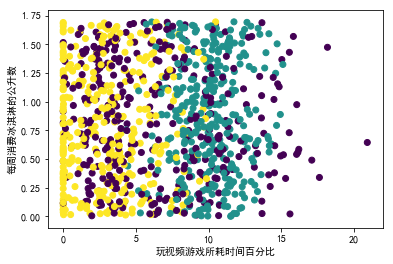

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)    #“111”表示“1×1网格，第一子图”，“234”表示“2×3网格，第四子图”
ax.scatter(returnMat1['gv_loss_time_rate'], returnMat1['ice_per_week'], c=squeeze(classLabelVector1))
# plt.add_legend
plt.xlabel('玩视频游戏所耗时间百分比')
plt.ylabel('每周消费冰淇淋的公升数')
plt.show()
## 最右边的表示largeDoses，中间的（分布比较零散的）表示didntLike，最左边的表示smallDoses

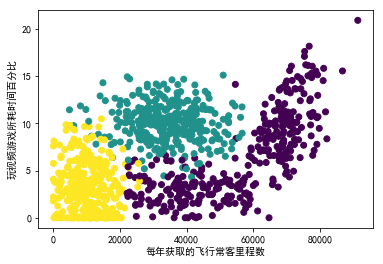

In [10]:
## 再分析了玩视频游戏所耗时间百分比、每年获取的飞行常客里程数
fig = plt.figure()
ax = fig.add_subplot(111)    #“111”表示“1×1网格，第一子图”，“234”表示“2×3网格，第四子图”
ax.scatter(returnMat1['lichengshu'], returnMat1['gv_loss_time_rate'], c=squeeze(classLabelVector1))
# plt.add_legend
plt.xlabel('每年获取的飞行常客里程数')
plt.ylabel('玩视频游戏所耗时间百分比')
plt.show()
## 最右边的表示didntLike，中间的表示largeDoses，最左边的表示smallDoses

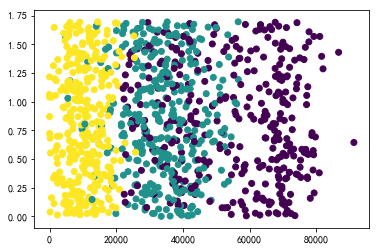

In [11]:
## 最后分析一下玩视频游戏所耗时间百分比、每周消费冰淇淋的公升数
plt.scatter(returnMat1['lichengshu'], returnMat1['ice_per_week'], c=squeeze(classLabelVector1))
plt.show()
## 最右边的表示didntLike，中间的表示largeDoses，最左边的表示smallDoses

## 2.3 对数据进行归一化处理
- 为了消除量纲

In [15]:
def autoNorm(returnMat1):
    """
    returnMat1: 数值型特征值
    
    return：
    极值化后的特征值，极差ranges，最小值minvals
    """
    
    ## min(0/1)：0表示按列去最小值，1表示按行取最小值
    minvals = returnMat1.min(0)    
    # print(minvals)
    maxvals = returnMat1.max(0)
    ranges = maxvals - minvals
    normDataSet = zeros(shape(returnMat1))
    m = returnMat1.shape[0]
    normDataSet = returnMat1 - tile(minvals, (m,1))
    normDataSet = normDataSet / tile(ranges, (m,1))
    return normDataSet, ranges, minvals

In [16]:
## ---------------test---------------------
# normDataSet, ranges, minvals = autoNorm(returnMat1)
# print(normDataSet.head())
# print(ranges)
# print(minvals)

## 2.4 测试算法：作为完整程序验证分类器
通常提供已有数据的90%作为训练样本来训练分类器，而使用其余的10%去测试分类器，检测分类器的正确率。   
- 注意：因为书上给的数据集是无序的，所以直接取了前10%作为测试集

In [31]:
testRate = 0.1
# 读取数据
returnMat1, classLabelVector1 = file2matrix_test('datingTestSet.txt')
# 对特征值进行归一化处理
normDataSet, ranges, minvals = autoNorm(returnMat1)
m = normDataSet.shape[0]
numTestVecs = int(m*testRate)
errorCount = 0.0
# print(normDataSet.iloc[2,][2])
# print(classLabelVector1[2:10])
for i in range(numTestVecs):
#     classifierResult = classify0(normDataSet[i,:], returnMat1[numTestVecs:m,:], classLabelVector1[numTestVecs:m], 3)
    classifierResult = classify0(normDataSet.iloc[i, :], normDataSet.iloc[numTestVecs:m, ], classLabelVector1[numTestVecs:m], 3, labelstart=100)

    print('the classifier came back with:{}; the real answer is {}'.format(classifierResult, int(classLabelVector1.loc[i].values)))
    if classifierResult != int(classLabelVector1.loc[i].values):
        errorCount += 1
print('the total error rate is {}'.format(errorCount/float(numTestVecs)))

the classifier came back with:1; the real answer is 1
the classifier came back with:2; the real answer is 2
the classifier came back with:0; the real answer is 0
the classifier came back with:0; the real answer is 0
the classifier came back with:0; the real answer is 0
the classifier came back with:0; the real answer is 0
the classifier came back with:1; the real answer is 1
the classifier came back with:1; the real answer is 1
the classifier came back with:0; the real answer is 0
the classifier came back with:1; the real answer is 1
the classifier came back with:0; the real answer is 0
the classifier came back with:0; the real answer is 0
the classifier came back with:2; the real answer is 2
the classifier came back with:0; the real answer is 0
the classifier came back with:0; the real answer is 0
the classifier came back with:0; the real answer is 0
the classifier came back with:0; the real answer is 0
the classifier came back with:0; the real answer is 0
the classifier came back wit

## 案例二：手写数字识别

In [27]:
from os import listdir
import pandas as pd

## 3.1 准备数据：将图像转换为测试向量

本例用的是$32*32$的图像，所以在进行建模之前，先将二进制转换为$1*1024$的向量：
- 循环读取文件的前32行，并将每行的前32个字符存储在Numpy数组中，然后返回数组

In [28]:
def img2vector(filename):
#     fr = open('./trainingDigits/0_0.txt')
    fr = open(filename)
    returnVect = zeros((1, 1024))
    for i in range(32):
        lineStr = fr.readline()
        for j in range(32):
            returnVect[0, 32*i+j] = int(lineStr[j])
    fr.close()
    return returnVect
# returnVect

## 3.2 测试算法：使用KNN算法识别手写数字
1. 准备训练集；
        
        1> 构造训练集：从训练集文件名中提取并构造训练集的标签；利用img2vector()函数构造训练集的特征值；
        
2. 建立KNN模型

In [32]:
hwlabels = []
traingFileList = listdir('trainingDigits')
m = len(traingFileList)
trainingMat = zeros((m, 1024))
for i in range(m):
    # 先从文件名中提取目标值
    fileNameStr = traingFileList[i]
    classNumStr = int(fileNameStr.split('.')[0].split('_')[0])
    hwlabels.append(classNumStr)
    # 再从该文件中构造特征值(1,1024)
    filename = 'trainingDigits/' + str(traingFileList[i])
    trainingMat[i, :] = img2vector(filename=filename)
hwlabels = pd.DataFrame(hwlabels)
# 建立KNN模型
testFileList = listdir('testDigits')
mtest = len(testFileList)
errorCount = 0.0
for i in range(mtest):
    fileNameStr = testFileList[i]
    classNumStr = int(fileNameStr.split('.')[0].split('_')[0])
    vectorUnderTest = img2vector('testDigits/' + str(testFileList[i]))
    classifierResult = classify0(vectorUnderTest, trainingMat, hwlabels, 3, labelstart=0)
    print('the classifier came back with:{}；the real result is {}'.format(classifierResult, classNumStr))
    if classifierResult!=classNumStr:
        errorCount += 1
print('\nthe total number of errors is ' + str(errorCount))
print('\nthe total error rate is ' + str(errorCount/mtest))

the classifier came back with:0；the real result is 0
the classifier came back with:0；the real result is 0
the classifier came back with:0；the real result is 0
the classifier came back with:0；the real result is 0
the classifier came back with:0；the real result is 0
the classifier came back with:0；the real result is 0
the classifier came back with:0；the real result is 0
the classifier came back with:0；the real result is 0
the classifier came back with:0；the real result is 0
the classifier came back with:0；the real result is 0
the classifier came back with:0；the real result is 0
the classifier came back with:0；the real result is 0
the classifier came back with:0；the real result is 0
the classifier came back with:0；the real result is 0
the classifier came back with:0；the real result is 0
the classifier came back with:0；the real result is 0
the classifier came back with:0；the real result is 0
the classifier came back with:0；the real result is 0
the classifier came back with:0；the real resul

the classifier came back with:1；the real result is 1
the classifier came back with:1；the real result is 1
the classifier came back with:1；the real result is 1
the classifier came back with:1；the real result is 1
the classifier came back with:1；the real result is 1
the classifier came back with:1；the real result is 1
the classifier came back with:1；the real result is 1
the classifier came back with:1；the real result is 1
the classifier came back with:1；the real result is 1
the classifier came back with:1；the real result is 1
the classifier came back with:1；the real result is 1
the classifier came back with:1；the real result is 1
the classifier came back with:1；the real result is 1
the classifier came back with:1；the real result is 1
the classifier came back with:7；the real result is 1
the classifier came back with:1；the real result is 1
the classifier came back with:1；the real result is 1
the classifier came back with:1；the real result is 1
the classifier came back with:1；the real resul

the classifier came back with:3；the real result is 3
the classifier came back with:3；the real result is 3
the classifier came back with:3；the real result is 3
the classifier came back with:3；the real result is 3
the classifier came back with:3；the real result is 3
the classifier came back with:3；the real result is 3
the classifier came back with:3；the real result is 3
the classifier came back with:3；the real result is 3
the classifier came back with:3；the real result is 3
the classifier came back with:3；the real result is 3
the classifier came back with:3；the real result is 3
the classifier came back with:3；the real result is 3
the classifier came back with:3；the real result is 3
the classifier came back with:3；the real result is 3
the classifier came back with:3；the real result is 3
the classifier came back with:3；the real result is 3
the classifier came back with:3；the real result is 3
the classifier came back with:3；the real result is 3
the classifier came back with:3；the real resul

the classifier came back with:4；the real result is 4
the classifier came back with:4；the real result is 4
the classifier came back with:4；the real result is 4
the classifier came back with:4；the real result is 4
the classifier came back with:4；the real result is 4
the classifier came back with:4；the real result is 4
the classifier came back with:4；the real result is 4
the classifier came back with:5；the real result is 5
the classifier came back with:5；the real result is 5
the classifier came back with:5；the real result is 5
the classifier came back with:5；the real result is 5
the classifier came back with:5；the real result is 5
the classifier came back with:5；the real result is 5
the classifier came back with:5；the real result is 5
the classifier came back with:5；the real result is 5
the classifier came back with:5；the real result is 5
the classifier came back with:5；the real result is 5
the classifier came back with:5；the real result is 5
the classifier came back with:5；the real resul

the classifier came back with:6；the real result is 6
the classifier came back with:6；the real result is 6
the classifier came back with:6；the real result is 6
the classifier came back with:6；the real result is 6
the classifier came back with:6；the real result is 6
the classifier came back with:6；the real result is 6
the classifier came back with:6；the real result is 6
the classifier came back with:6；the real result is 6
the classifier came back with:6；the real result is 6
the classifier came back with:6；the real result is 6
the classifier came back with:6；the real result is 6
the classifier came back with:6；the real result is 6
the classifier came back with:6；the real result is 6
the classifier came back with:6；the real result is 6
the classifier came back with:6；the real result is 6
the classifier came back with:6；the real result is 6
the classifier came back with:6；the real result is 6
the classifier came back with:6；the real result is 6
the classifier came back with:6；the real resul

the classifier came back with:8；the real result is 8
the classifier came back with:8；the real result is 8
the classifier came back with:3；the real result is 8
the classifier came back with:8；the real result is 8
the classifier came back with:8；the real result is 8
the classifier came back with:8；the real result is 8
the classifier came back with:8；the real result is 8
the classifier came back with:8；the real result is 8
the classifier came back with:8；the real result is 8
the classifier came back with:8；the real result is 8
the classifier came back with:8；the real result is 8
the classifier came back with:8；the real result is 8
the classifier came back with:8；the real result is 8
the classifier came back with:8；the real result is 8
the classifier came back with:8；the real result is 8
the classifier came back with:8；the real result is 8
the classifier came back with:1；the real result is 8
the classifier came back with:8；the real result is 8
the classifier came back with:8；the real resul

the classifier came back with:9；the real result is 9
the classifier came back with:9；the real result is 9
the classifier came back with:9；the real result is 9
the classifier came back with:9；the real result is 9
the classifier came back with:9；the real result is 9
the classifier came back with:9；the real result is 9
the classifier came back with:9；the real result is 9

the total number of errors is 10.0

the total error rate is 0.010570824524312896
